In [10]:
import numpy as np
import pandas as pd
import math 
import random 
import os
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)


In [28]:
# dataframe for Toronto housing prices
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [29]:
# size of the dataset
df.shape

(13320, 9)

In [30]:
# types of each column
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [33]:
# Distribution of area types by quantity
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [36]:
# Dropping a few columns that are not important for price prediction
df2 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Data Cleaning 

In [37]:
# how much data is not available
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [38]:
# since the number of null data is small, we will drop all of them
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [39]:
# There is some non-uniformity in 'size' column, let us see that
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [42]:
# Let us add a numerical column for bhk

df3.loc[:, 'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\asd\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [43]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [45]:
# Now, the 'bhk' column looks good!
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [46]:
# Let us check for other columns also
df3['total_sqft'].unique()
# Here we have range values also (1133 - 1384) that needs to be cleaned

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [48]:
def is_num(n):
    try:
        float(n)
    except:
        return False
    return True

In [51]:
df3[~df3['total_sqft'].apply(is_num)]
# Thus we have 190 rows that have a range, instead of num in their 'total_sqft' column

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [52]:
df3[~df3['total_sqft'].apply(is_num)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [54]:
def convert_range_to_num(r):
    # If the incoming value is a range, we split it by '-' and return their average
    tokens = r.split('-') 
    if len(tokens) == 2:
        avg = (float(tokens[0]) + float(tokens[1])/2)
        return avg       
    
    try:
        return float(r)   # If the incoming value is a num, we return it
    except:
        return None       # If the incoming value is something else, we return None

In [59]:
# Cleaning the 'total_sqft' column using the above function
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_range_to_num)
df4.loc[25:32,:] # glimpse of clean column

,location,size,total_sqft,bath,price,bhk
25,Mangammanapalya,3 BHK,1250.0,3.0,56.00,3
26,Electronic City,2 BHK,660.0,1.0,23.10,2
27,Whitefield,3 BHK,1610.0,3.0,81.00,3
28,Ramagondanahalli,2 BHK,1151.0,2.0,48.77,2
29,Electronic City,3 BHK,1025.0,2.0,47.00,3
30,Yelahanka,4 BHK,3525.0,4.0,186.00,4
31,Bisuvanahalli,3 BHK,1075.0,2.0,35.00,3
32,Hebbal,3 BHK,1760.0,2.0,123.00,3


### Feature Engineering 

In [82]:
# Converting price in lacs to price per squared feet

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [83]:
# checking the number of locations

df5['location'].nunique()

1304

In [84]:
# These are too many locations to handle (can introduce: Curse of dimensionality)
# Let us count, how many times each of them occur
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [85]:
len(location_stats[location_stats <= 10])

# Majority of the locations have less than 10 data points 

1052

In [86]:
# Hence we can put all these into one category
location_stats_less_than_10 = location_stats[location_stats <= 10]

df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

df5.location.nunique()

242

In [87]:
df5.loc[7:12,:]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,38.00,2,3800.000000


## Outlier detection and removal 

In [88]:
# For a typical house, the size per bedroom is  300 sqft (minimum)
# So let us find houses (anomalies) that have per bedroom area less than 300 sqft
df5[df5['total_sqft']/df5['bhk'] < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [89]:
# Getting rid of the anamolies
print(df5.shape)
df6 = df5[~(df5['total_sqft']/df5['bhk'] < 300)]
print(df6.shape)
# We got rid of 744 Outliers

(13246, 7)
(12502, 7)


In [91]:
# Let us find outliers in price_per_sqft
df6.price_per_sqft.describe()

# both min. and max. are outliers and unhelpful in building a generic model

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [99]:
# Let us remove houses with prices_per_sqf more than 
# 1 std. deviation away from the mean, for every location 

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft < (mean + std)) & (subdf.price_per_sqft > (mean - std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape
# we removed more than 2000 outliers from our dataset

(10231, 7)

In [102]:
df7.price_per_sqft.describe()
# the min. and max. values are now within 1 std. range (for each location)

count    10231.000000
mean      5645.224070
std       2271.334896
min       1250.000000
25%       4217.096349
50%       5163.333333
75%       6414.219181
max      24509.803922
Name: price_per_sqft, dtype: float64

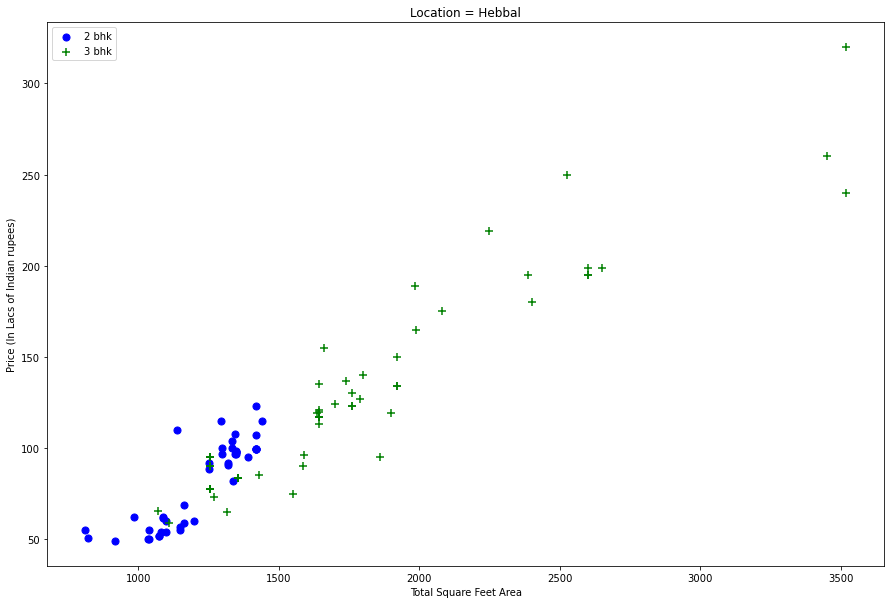

In [116]:
# Going through the data, we noticed that many 2bhk apartments are 
# more expensive than 3bhk. Let us visualize them in a scatter plot for better understanding

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 bhk', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', marker = '+', label = '3 bhk', s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (In Lacs of Indian rupees)')
    plt.title(f'Location = {location}')
    plt.legend()

plot_scatter_chart(df7, 'Hebbal')

As we can see (above fig), there is an overlap in the middle (X-axis: ~1700) where <br>
many `2bhk homes (in blue) are more expensive than 3 bhk homes (in green)` even when <br>
they have the same area as well as same location. `These are outliers and must be removed` (in each location).

In [113]:
# The below fn. performs this outlier cleaning for all bhk, for every location

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7326, 7)

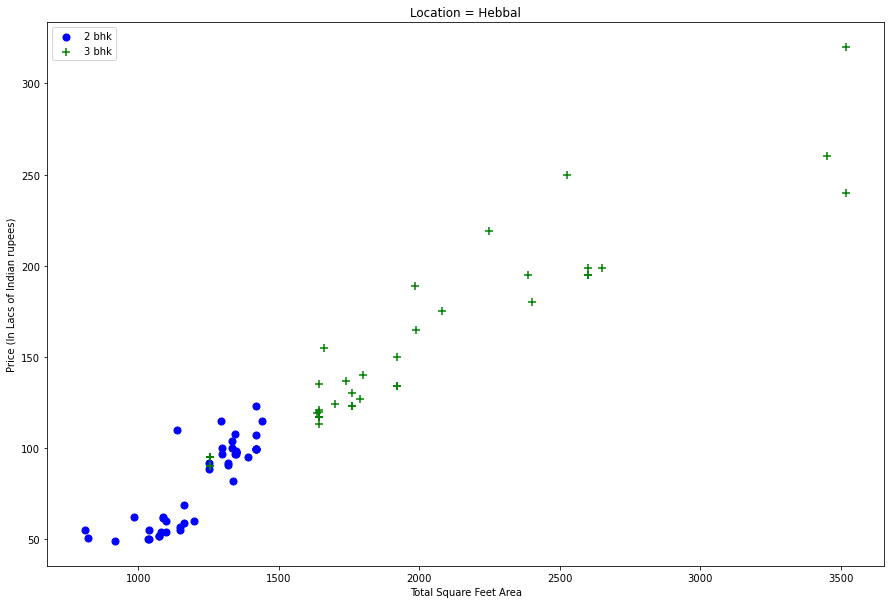

In [117]:
# Let us see how much improvement in overlap have we got now
plot_scatter_chart(df8, 'Hebbal')

# decent improvement it seems!

Text(0, 0.5, 'Counts')

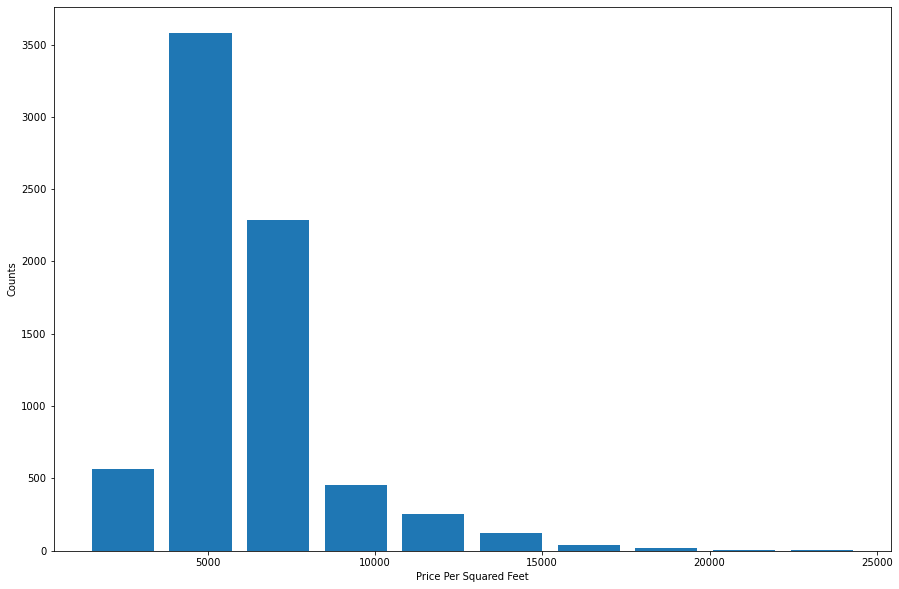

In [120]:
# Visualizing the distribution of homes by price_per_sqft

plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price Per Squared Feet')
plt.ylabel('Counts')

# The distribution is almost Normal

In [121]:
# Some homes have way more number of bathrooms than is necessary/normal

df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5273,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8476,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8565,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9298,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9629,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [123]:
# Normally, a home has the same # of bathrooms as bedrooms
# Hence as data cleanup, let us remove homes that have more bathrooms than ''# of bedrooms + 2'

df8[df8.bath > df8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1625,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5234,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6705,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8401,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [143]:
df9 = df8[df8.bath < df8.bhk + 2]
df9.shape

(7252, 7)

* Now our data looks pretty neat and is ready for model building
* So let us finally drop the unnecessary features

In [144]:
df10 = df9.drop(['size', 'price_per_sqft'], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Model Building 

In [145]:
# For applying a Machine Leanring model, all the features must be numerical
# but 'location' is still text (and categorical). So we will 1-hot-encode it

dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
# since 1-hot-encoding can do with 1 less feature, we drop 'others'
dummies = dummies.drop(['other'], axis = 'columns')
# join 1-hot-encoded cols with df10
df11 = pd.concat([df10, dummies], axis = 'columns')
# drop 'location'
df11 = df11.drop(['location'], axis = 'columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
# Independent variable
X = df11.drop(['price'], axis = 'columns')
# dependent variable
y = df11.price


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [154]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8515492485425744

### Cross Validation 

In [155]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), X, y, cv = cv)

# Thus we are getting around 85% accuracy with our linear regressor

array([0.83419256, 0.84066871, 0.85637292, 0.84326517, 0.84613103])

In [157]:
# Let us try more regressors to see if we can get better results
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [163]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)
# grid searchcv not only selects the best ml algorithm but 
# also selects the best parameters for that algorithm

,model,best_score,best_params
0,linear regression,0.844126,{'normalize': True}
1,lasso,0.717719,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.682547,"{'criterion': 'mse', 'splitter': 'best'}"


In [179]:
# Predicting the price of a house

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

predict_price('Yelachenahalli', 1000, 2, 2)

53.805418288164425

In [180]:
predict_price('Yelachenahalli', 1000, 3, 3)
# for the same location, cost is higher if no. of bhk and bath increases

56.99490443186456

In [182]:
predict_price('Yelachenahalli', 1000, 2, 3)
# so if you have ab extra room the price decreases, since one of the bedrooms do not have a bath

52.35611030584284

### Exporting our model as a pickle file, so that we can deploy it as a web app (using flask)

In [183]:
import pickle
with open('bengaluru_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [184]:
# We also need to export column names as json file so that our model can access them

import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))